In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
data = {
    'Size': ['Small', 'Medium', 'Large', 'Small', 'Medium', 'Large', 'Small'],
    'Color': ['Brown', 'Black', 'White', 'White', 'Brown', 'Black', 'Black'],
    'Legs': [4, 4, 4, 2, 4, 4, 2],
    'Animal Type': ['Cat', 'Dog', 'Dog', 'Bird', 'Cat', 'Dog', 'Bird']
}


In [14]:
df=pd.DataFrame(data)

In [15]:
df

,Size,Color,Legs,Animal Type
0,Small,Brown,4,Cat
1,Medium,Black,4,Dog
2,Large,White,4,Dog
3,Small,White,2,Bird
4,Medium,Brown,4,Cat
5,Large,Black,4,Dog
6,Small,Black,2,Bird


In [16]:
#turing strings into neumarical values

In [17]:
label_encoders = {}
for column in ['Size', 'Color', 'Legs', 'Animal Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [40]:
df

,Size,Color,Legs,Animal Type
0,2,1,1,1
1,1,0,1,2
2,0,2,1,2
3,2,2,0,0
4,1,1,1,1
5,0,0,1,2
6,2,0,0,0


In [24]:
x=df.drop('Animal Type',axis=1)

In [25]:
y=df['Animal Type']

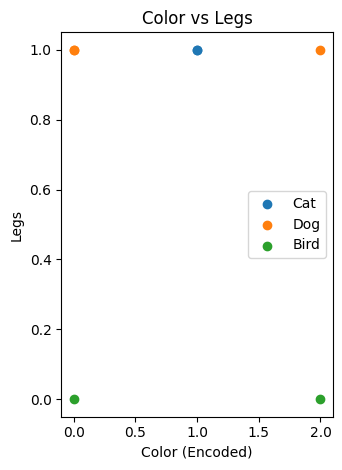

In [27]:
# Plot for Color vs Legs
plt.subplot(1, 2, 2)
for animal_type in df['Animal Type'].unique():
    plt.scatter(
        x[df['Animal Type'] == animal_type]['Color'],
        x[df['Animal Type'] == animal_type]['Legs'],
        label=label_encoders['Animal Type'].inverse_transform([animal_type])[0]
    )
plt.xlabel('Color (Encoded)')
plt.ylabel('Legs')
plt.title('Color vs Legs')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
model=DecisionTreeClassifier(criterion='entropy',random_state=42) 

In [35]:
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [36]:
prediction=model.predict(x)

In [37]:
print(y)

0    1
1    2
2    2
3    0
4    1
5    2
6    0
Name: Animal Type, dtype: int32


In [39]:
decoded_predictions = label_encoders['Animal Type'].inverse_transform(prediction)
print("Decoded Predictions:", decoded_predictions)

Decoded Predictions: ['Cat' 'Dog' 'Dog' 'Bird' 'Cat' 'Dog' 'Bird']
